In [1]:
#Kerasを動かすバックエンド
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks

Using Theano backend.
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\t

In [2]:
#Kerasの必要なコンポーネントをインポート
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

In [3]:
#データを高速かつ効率的に使えるPandasをインポート
import pandas as pd
#数値計算を効率的に行うnumpyをインポート
import numpy as np

In [4]:
#グラフが簡単に描写できるMatplotlibをインポート
import matplotlib
import matplotlib.pyplot as plt

In [5]:
#各モジュールをインポート
import cv2
import copy
import os
import glob

In [6]:
path='./data/gakusyuu'
imgs=[]
labels=[]
f_=[0,0,0,0]
dirs = os.listdir(path)
dir_list = [f for f in dirs if os.path.isdir(os.path.join(path, f))]
for label in dir_list:
    file=glob.glob(path+"/"+label+"/*")
    temp=copy.copy(f_)
    temp[int(label)]=1
    
    for img_path in file:
        img_path=img_path
        img=cv2.imread(img_path,0)
        img=img[:, :, np.newaxis]
        imgs.append(img)
        labels.append(temp)
        #print(img_path)
        #print(np.shape(img))
        
X_train=np.asarray(imgs)
y_train=np.asarray(labels)

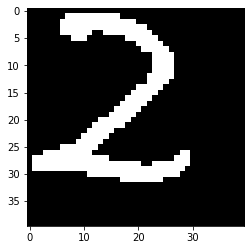

In [7]:
%matplotlib inline 
plt.imshow(X_train[1946].reshape(40,40),cmap = "gray")
plt.show()

In [8]:
y_train[1946]

array([1, 0, 0, 0])

In [9]:
path='./data/test'
imgs=[]
labels=[]
cnt=0
f_=[0,0,0,0]
file=glob.glob(path+"/*")
for img_path in file:
    temp=copy.copy(f_)
    if cnt>3:
        cnt-=4
    temp[cnt]=1
    cnt+=1
    img_path=img_path
    img=cv2.imread(img_path,0)
    img=img[:, :, np.newaxis]
    imgs.append(img)
    labels.append(temp)
    #print(img_path)
    #print(np.shape(img))
        
X_test=np.asarray(imgs)
y_test=np.asarray(labels)

In [10]:
print(X_train.shape)
print(y_train.shape)

(20000, 40, 40, 1)
(20000, 4)


In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
X_train /= 255
X_test /= 255

In [13]:
np.shape(X_train)

(20000, 40, 40, 1)

In [14]:
np.shape(X_test)

(19080, 40, 40, 1)

In [15]:
np.shape(y_train)

(20000, 4)

In [16]:
np.shape(y_test)

(19080, 4)

In [17]:
# モデルの宣言
model = Sequential()

In [18]:
# 先に作成したmodelへレイヤーを追加
import theano.ifelse
model.add(Conv2D(32, 3, 3,
                 activation='relu',
                 input_shape=(40,40,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

C:\Users\81801\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(40, 40, 1...)`
  """


In [19]:
# Learnig Processの設定
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [20]:
# モデルの訓練（エポック ２０）
history=model.fit(X_train, y_train, nb_epoch=20)

C:\Users\81801\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1139 - accuracy: 0.9621
Epoch 2/20
20000/20000 [==============================] - 52s 3ms/step - loss: 0.0193 - accuracy: 0.9943
Epoch 3/20
20000/20000 [==============================] - 52s 3ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 4/20
20000/20000 [==============================] - 56s 3ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 5/20
20000/20000 [==============================] - 64s 3ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 6/20
20000/20000 [==============================] - 66s 3ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 7/20
20000/20000 [==============================] - 56s 3ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 8/20
20000/20000 [==============================] - 54s 3ms/step - loss: 0.0041 - accuracy: 0.9988
Epoch 9/20
20000/20000 [==============================] - 55s 3ms/step - loss: 0.0041 - accuracy: 0.9985
Epoch 10/20
20000/20000 [==============================

In [21]:
# テストデータを使ってモデルの評価
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

19080/19080 [==============================] - 15s 781us/step
[0.05357674824073789, 0.9888364672660828]


In [22]:
#モデルの保存
result_dir='./data/result_adam'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
model.save_weights(os.path.join(result_dir,'weight.h5'))
model.save(os.path.join(result_dir,'model.h5'))

In [23]:
acc=copy.copy(history.history["accuracy"])
acc.insert(0,0)
loss=copy.copy(history.history["loss"])
loss.insert(0,0)
print(acc)
print(loss)

[0, array(0.9621, dtype=float32), array(0.9943, dtype=float32), array(0.9972, dtype=float32), array(0.9972, dtype=float32), array(0.9992, dtype=float32), array(0.99945, dtype=float32), array(0.99945, dtype=float32), array(0.9988, dtype=float32), array(0.99855, dtype=float32), array(0.99915, dtype=float32), array(0.99995, dtype=float32), array(0.99965, dtype=float32), array(0.99925, dtype=float32), array(0.9989, dtype=float32), array(0.9998, dtype=float32), array(1., dtype=float32), array(0.99965, dtype=float32), array(0.99955, dtype=float32), array(0.9997, dtype=float32), array(0.9992, dtype=float32)]
[0, 0.11389646300375461, 0.019334692470554728, 0.00970196717264189, 0.008333229824800219, 0.0034113776364851217, 0.002167442229098924, 0.0018568263863522588, 0.004081018509415799, 0.004148629902197081, 0.002530554280182514, 0.0004497907710104528, 0.0012968853493410734, 0.0018497478128823787, 0.003800219309227282, 0.0011464858251293436, 0.0001897861364755272, 0.0011305809172622275, 0.00127

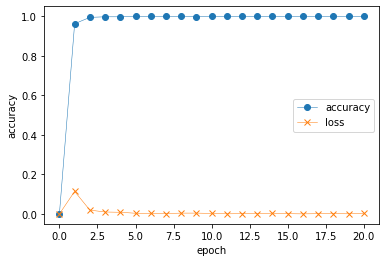

In [24]:
# 学習結果を描写
import matplotlib.pyplot as plt
import copy
#accのプロット
plt.plot(acc, lw=0.5,label="accuracy", ls="-", marker="o")
plt.plot(loss,lw=0.5, label="loss", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
#学習曲線の保存
plt.savefig(result_dir+'/sgd.png')
plt.show()

In [25]:
# X_testを使って予測を行う
predictions = model.predict_classes(X_test)
x = list(predictions)
y = list(y_test)
results = pd.DataFrame({'Actual': y, 'Predictions': x})
results[1:10]

,Actual,Predictions
1,"[0, 1, 0, 0]",1
2,"[0, 0, 1, 0]",2
3,"[0, 0, 0, 1]",3
4,"[1, 0, 0, 0]",0
5,"[0, 1, 0, 0]",1
6,"[0, 0, 1, 0]",2
7,"[0, 0, 0, 1]",3
8,"[1, 0, 0, 0]",0
9,"[0, 1, 0, 0]",1
